In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

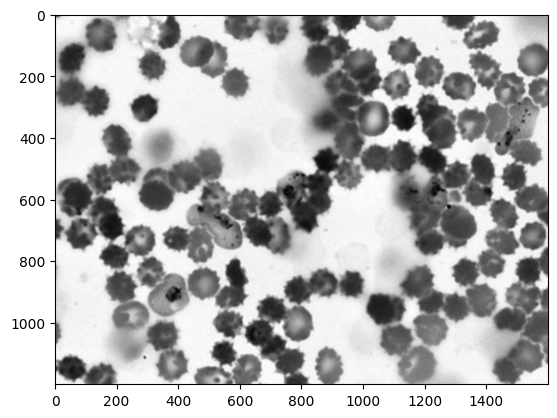

In [89]:
img = cv2.imread('C:\\Projects\\cell_detector\\data\\test\\original\\e3c1442a-717f-41dd-bf97-81e1233ac9fa.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 0)
plt.imshow(blur, cmap='gray')

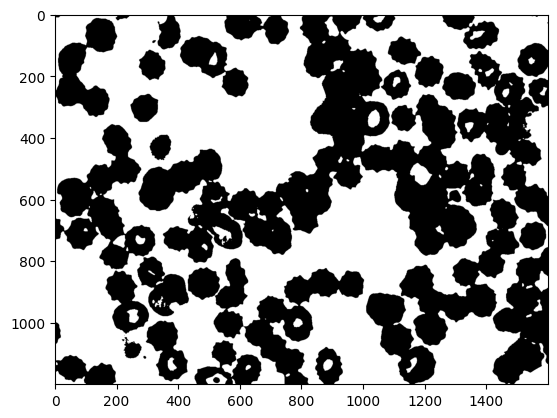

In [90]:
_, binary = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(binary, cmap='gray')

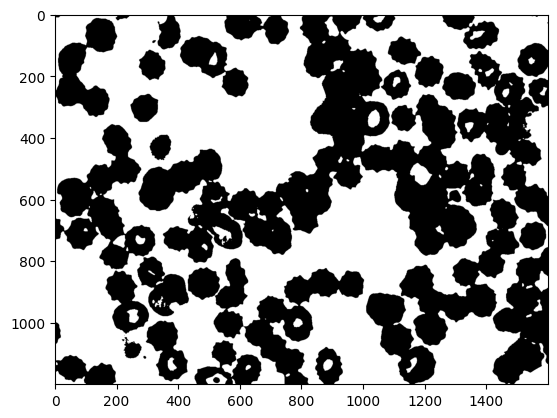

In [91]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=0)
plt.imshow(opening, cmap='gray')

In [92]:
_, threshold = cv2.threshold(opening, 150, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

circles = []

for cnt in contours:
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [cnt], -1, 255, 1)
    
    circles_tmp = cv2.HoughCircles(mask,cv2.HOUGH_GRADIENT,1, 30, param1=150, param2=15, minRadius=30, maxRadius=65)


    if circles_tmp is not None:
        circles_tmp = np.round(circles_tmp[0, :]).astype("int")
        for c in circles_tmp:
            if mask[c[1]-1][c[0]-1] == 0:
                circles.append(c)


circles = [circles]
len(circles[0])

100

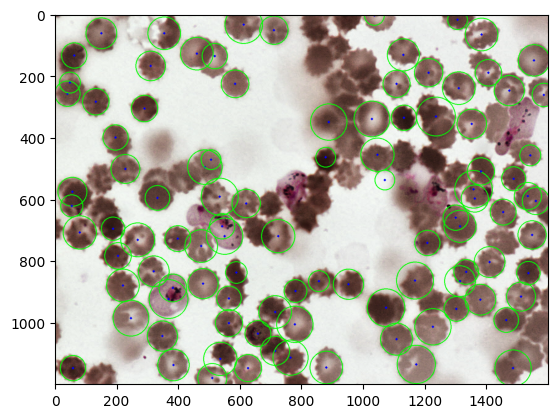

In [93]:
cimg = img.copy()
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(cimg)